<a href="https://colab.research.google.com/github/YusufAbdurrahmann/statistik/blob/main/statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

In [12]:
# group 1 = tanpa pupuk
# group 2 = dengan pupuk
rataan1 = 50
rataan2 = 50

# dengantandar Deviasi (variasi) sama untuk 2 kelompok
sd = 5

# Ukuran sampel dua kelompok
sample1 = 50
sample2 = 40

In [13]:
# Generate bilangan random
test = np.random.randn(sample1)
test

array([-1.0994847 , -0.21602002, -1.47976728, -0.210844  ,  0.88121229,
       -0.62356595, -0.99692391,  0.45487492,  0.80340767,  0.76897202,
       -0.43931905,  1.30669383,  1.72816899, -1.52182143,  0.56771077,
       -1.25823537,  1.04640666, -0.89640336,  0.44362443,  2.96980316,
        0.01535871,  0.5643005 , -0.81998095, -0.83538205, -2.11217333,
       -1.04632858, -1.52020344, -0.05144607,  0.76944995, -0.87971998,
       -2.27750906, -1.08542987,  0.08361897,  0.5156574 , -0.75434952,
        0.23478697, -0.24296849,  0.05877384,  1.03523514,  1.61990469,
       -0.17803788,  0.30760844, -1.19771575,  0.33794147,  0.0462698 ,
       -1.8237368 ,  0.64121773,  1.07701726, -0.69367461, -2.62714651])

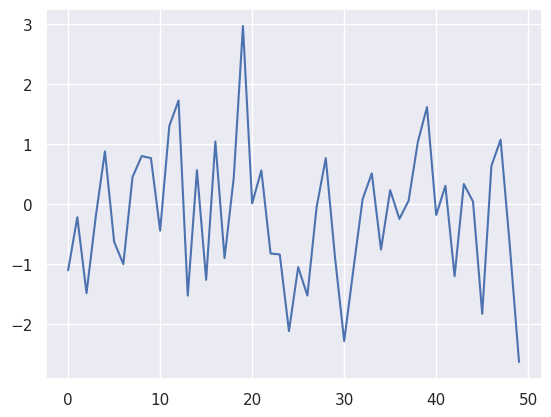

In [14]:
plt.plot(test)

<ipython-input-15-c74cf531398a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test)


<Axes: ylabel='Density'>

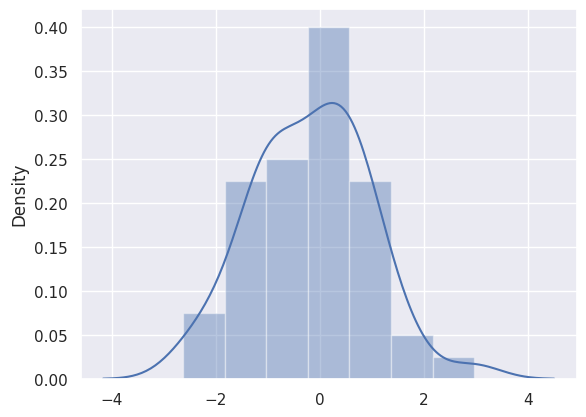

In [15]:
sns.distplot(test)

In [28]:
# Generate data
data1 = np.random.randn(sample1) * sd + rataan1
data2 = np.random.randn(sample2) * sd + rataan2

# Menaggabungkan sample size (jumlah data)
kelompok_data = [sample1, sample2]

batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [29]:
batas

[np.float64(38.80832404508837), np.float64(62.170907457540295)]

<ipython-input-30-3c56ded6807c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data1, hist = False, label = "Data1")
<ipython-input-30-3c56ded6807c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data2, hist = False, label = "Data2")


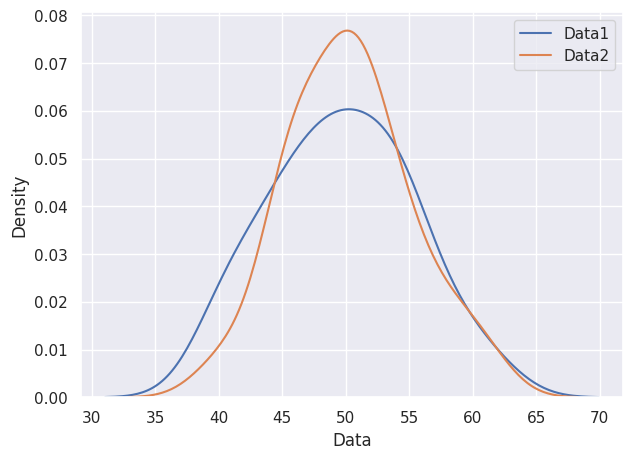

In [30]:
# Plot distirbusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist = False, label = "Data1")
a = sns.distplot(data2, hist = False, label = "Data2")
a.set(xlabel = "Data", ylabel="Density")
plt.legend()

Text(0.5, 1.0, 'Dua KelompokTIDAK berbeda secara signifikan t(88)=-0.51, p = 0.611249')

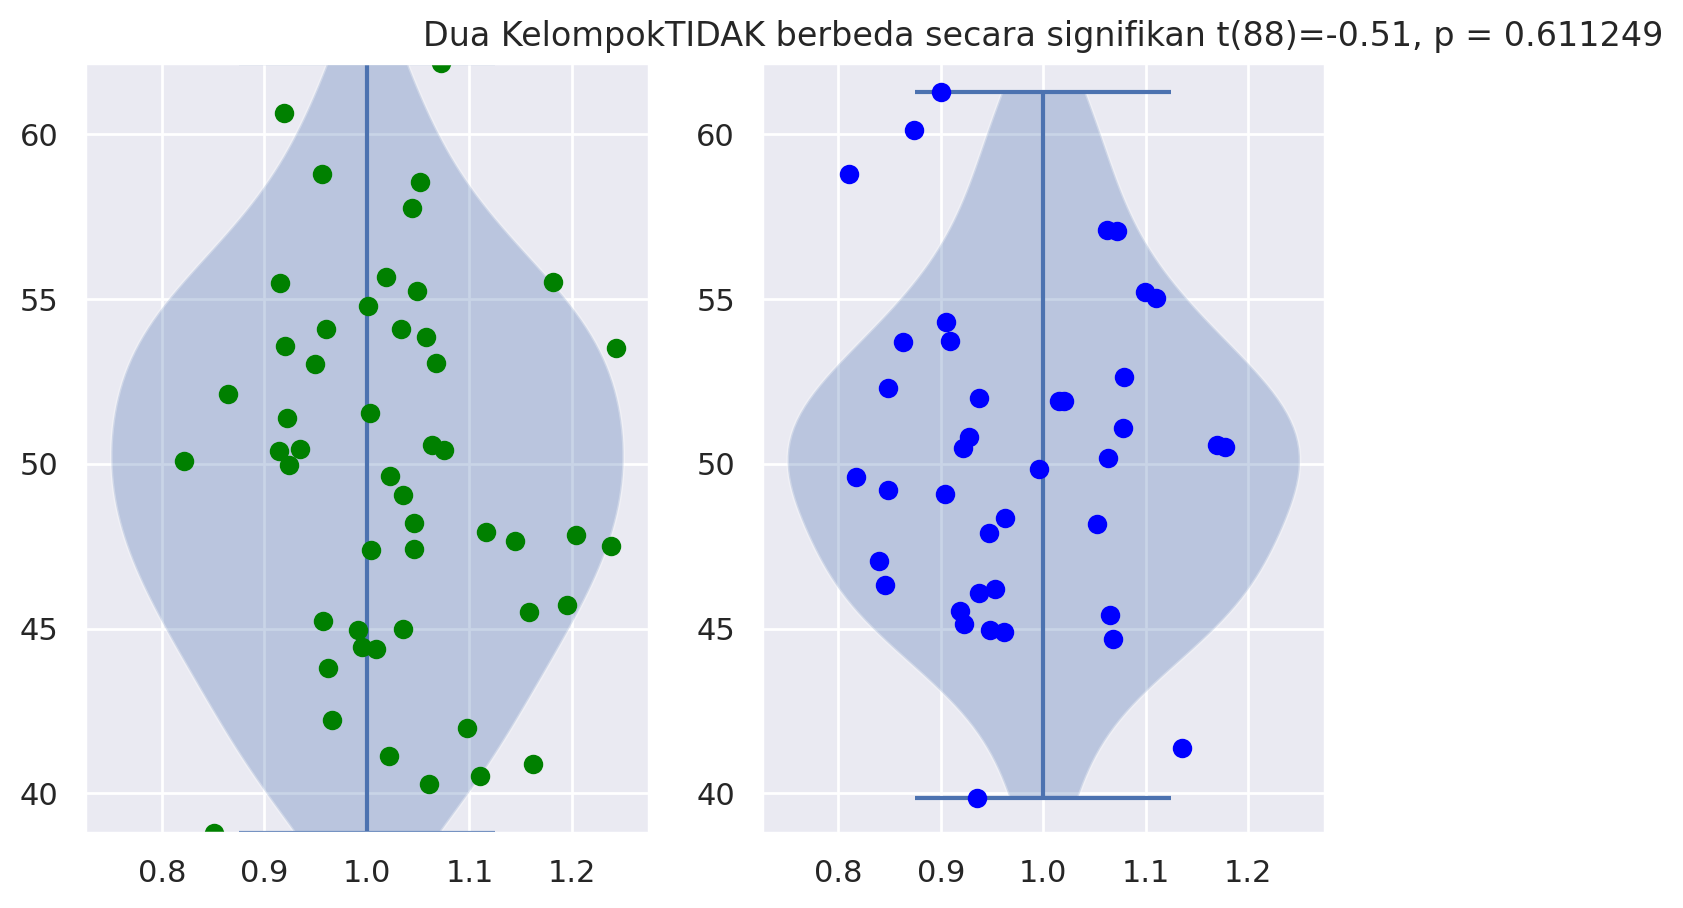

In [35]:
# Melakukan uji statistik (statistik inferential)
fig, ax = plt.subplots(1,2, figsize = (8,5), dpi=200)
ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, "o", color= "green")
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, "o", color= "blue")
ax[1].set_ylim(batas)

# Melakukan uji t-test
t,p = stats.ttest_ind(data1, data2)

# Mencetak hasil t-test
sigtext = ("","TIDAK")
plt.title("Dua Kelompok{} berbeda secara signifikan t({})={}, p = {}".format(sigtext[int(p>.05)],
                                                                             sum(kelompok_data)-2,
                                                                             np.round(t,2),
                                                                             np.round(p,6)))

In [36]:
p

np.float64(0.6112493299396167)